In [18]:
 
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jupyterthemes
import warnings

from robot import Robot

In [10]:
jupyterthemes.jtplot.style()
warnings.filterwarnings("ignore")
sns.set_context("poster")

In [16]:
# -----------
# User Instructions
#
# Implement a P controller by running 100 iterations
# of robot motion. The desired trajectory for the 
# robot is the x-axis. The steering angle should be set
# by the parameter tau so that:
#
# steering = -tau * crosstrack_error
#
# You'll only need to modify the `run` function at the bottom.
# ------------


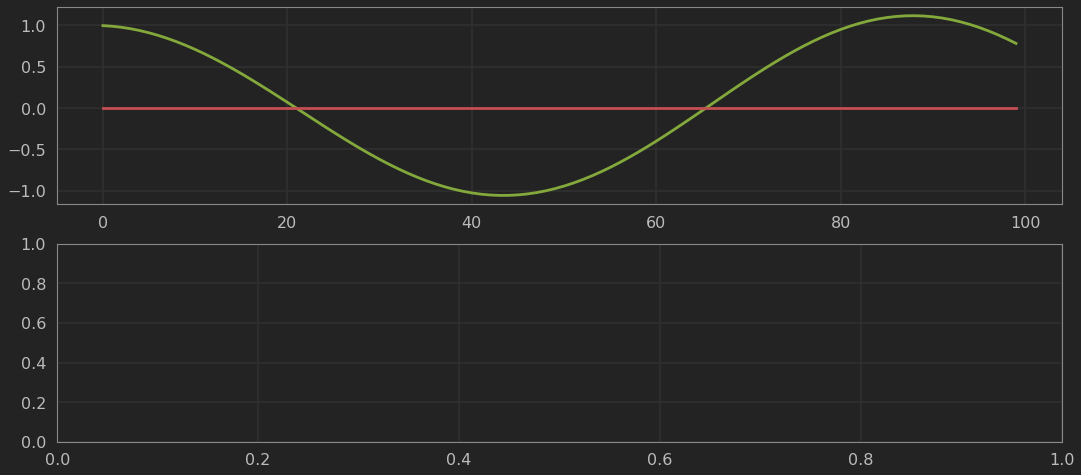

In [17]:
############# ADD / MODIFY CODE BELOW ####################
# ------------------------------------------------------------------------
#
# run - does a single control run
robot = Robot()
robot.set(0, 1, 0)

def run(robot, tau, n=100, speed=1.0):
    def move_get_y():
        cte = robot.y
        steer = -tau * cte
        robot.move(steer, speed)
        return robot.y
    
    x_trajectory = np.arange(n)
    y_trajectory = [move_get_y() for _ in x_trajectory]

    return x_trajectory, y_trajectory
    
x_trajectory, y_trajectory = run(robot, 0.1)
n = len(x_trajectory)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8))
ax1.plot(x_trajectory, y_trajectory, 'g', label='P controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')